In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from matplotlib import pyplot as plt
import random
pdata=pd.read_csv("/Users/vasukhanna/Desktop/population.csv")
morethandata=pd.read_csv("/Users/vasukhanna/Desktop/more_than_50k.csv")
description=pd.read_csv("/Users/vasukhanna/Desktop/Dataset Description.csv")
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 40 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   AAGE      199523 non-null  int64 
 1   ACLSWKR   199523 non-null  object
 2   ADTIND    199523 non-null  int64 
 3   ADTOCC    199523 non-null  int64 
 4   AHGA      199523 non-null  object
 5   AHRSPAY   199523 non-null  int64 
 6   AHSCOL    199523 non-null  object
 7   AMARITL   199523 non-null  object
 8   AMJIND    199523 non-null  object
 9   AMJOCC    199523 non-null  object
 10  ARACE     199523 non-null  object
 11  AREORGN   199523 non-null  object
 12  ASEX      199523 non-null  object
 13  AUNMEM    199523 non-null  object
 14  AUNTYPE   199523 non-null  object
 15  AWKSTAT   199523 non-null  object
 16  CAPGAIN   199523 non-null  int64 
 17  CAPLOSS   199523 non-null  int64 
 18  DIVVAL    199523 non-null  int64 
 19  FILESTAT  199523 non-null  object
 20  GRINREG   199523 non-null 

In [257]:
pip install pyclustering

     |████████████████████████████████| 2.6 MB 1.1 MB/s eta 0:00:01
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395121 sha256=03bc851a437cb21e209048646e979c75615dbb3c007a54b3893da590191ce555
  Stored in directory: /Users/vasukhanna/Library/Caches/pip/wheels/e0/56/c2/abb6866a3fcd8a55862f1df8a18f57805c3a78fed9a9023cb9
Successfully built pyclustering
Note: you may need to restart the kernel to use updated packages.


In [7]:
print(pdata.isnull().sum())

AAGE        0
ACLSWKR     0
ADTIND      0
ADTOCC      0
AHGA        0
AHRSPAY     0
AHSCOL      0
AMARITL     0
AMJIND      0
AMJOCC      0
ARACE       0
AREORGN     0
ASEX        0
AUNMEM      0
AUNTYPE     0
AWKSTAT     0
CAPGAIN     0
CAPLOSS     0
DIVVAL      0
FILESTAT    0
GRINREG     0
GRINST      0
HHDFMX      0
HHDREL      0
MIGMTR1     0
MIGMTR3     0
MIGMTR4     0
MIGSAME     0
MIGSUN      0
NOEMP       0
PARENT      0
PEFNTVTY    0
PEMNTVTY    0
PENATVTY    0
PRCITSHP    0
SEOTR       0
VETQVA      0
VETYN       0
WKSWORK     0
YEAR        0
dtype: int64


In [55]:
for i in pdata:
    
    pdata[i][pdata[i]=='?']=np.nan

/var/folders/zr/yqnbpb7n7vvcvk35sn9k86640000gn/T/ipykernel_18248/3198493438.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vari1[vari1==' ?']=np.nan


In [56]:
print(pdata.isnull().sum())

AAGE            0
ACLSWKR         0
ADTIND          0
ADTOCC          0
AHGA            0
AHRSPAY         0
AHSCOL          0
AMARITL         0
AMJIND          0
AMJOCC          0
ARACE           0
AREORGN         0
ASEX            0
AUNMEM          0
AUNTYPE         0
AWKSTAT         0
CAPGAIN         0
CAPLOSS         0
DIVVAL          0
FILESTAT        0
GRINREG         0
GRINST        708
HHDFMX          0
HHDREL          0
MIGMTR1     99696
MIGMTR3     99696
MIGMTR4     99696
MIGSAME         0
MIGSUN      99696
NOEMP           0
PARENT          0
PEFNTVTY     6713
PEMNTVTY     6119
PENATVTY     3393
PRCITSHP        0
SEOTR           0
VETQVA          0
VETYN           0
WKSWORK         0
YEAR            0
dtype: int64


In [8]:
# removing data with 30% null values
drop=["MIGMTR1","MIGMTR3","MIGMTR4","MIGSUN"]
for i in drop:
    pdata=pdata.drop(i,axis=1)


In [9]:
for col in pdata.columns:
    mode=pdata[col].mode()
    pdata[col].fillna(mode[0],inplace=True)

print(pdata.isnull().sum())

AAGE        0
ACLSWKR     0
ADTIND      0
ADTOCC      0
AHGA        0
AHRSPAY     0
AHSCOL      0
AMARITL     0
AMJIND      0
AMJOCC      0
ARACE       0
AREORGN     0
ASEX        0
AUNMEM      0
AUNTYPE     0
AWKSTAT     0
CAPGAIN     0
CAPLOSS     0
DIVVAL      0
FILESTAT    0
GRINREG     0
GRINST      0
HHDFMX      0
HHDREL      0
MIGSAME     0
NOEMP       0
PARENT      0
PEFNTVTY    0
PEMNTVTY    0
PENATVTY    0
PRCITSHP    0
SEOTR       0
VETQVA      0
VETYN       0
WKSWORK     0
YEAR        0
dtype: int64


In [13]:
description

,Column Code,Distict Values,Column,Type
0,AAGE,91,age,numerical
1,ACLSWKR,9,class of worker,categorical
2,ADTIND,52,industry code,categorical
3,ADTOCC,47,occupation code,categorical
4,AHGA,17,education,categorical
5,AHRSPAY,1240,wage per hour,numerical
6,AHSCOL,3,enrolled in edu inst last wk,categorical
7,AMARITL,7,marital status,categorical
8,AMJIND,24,major industry code,categorical
9,AMJOCC,15,major occupation code,categorical


In [10]:
pdata["AAGE"].max()
pdata["AAGE"].mean()
bins=[0,13,18,60,100]
labels=["Child","Teenager","Adult","Elderly"]
pdata["AAGE_category"]=pd.cut(pdata["AAGE"],bins,labels=labels)


In [11]:
pdata["AHRSPAY"].max()
pdata["AHRSPAY"].mean()
bins=[-1,100,500,10000]
labels=["low wage","average wage","high Wage"]
pdata["WAGE_CATEGORY"]=pd.cut(pdata["AHRSPAY"],bins,labels=labels)


In [12]:

pdata["CAPGAIN"].mean()
bins=[-1,100,1000,20000,100000]
labels=["low ","average ","Good "," very High"]
pdata["Cap_gain"]=pd.cut(pdata["CAPGAIN"],bins,labels=labels)


In [13]:
pdata["CAPLOSS"].mean()
bins=[-1,20,100,3000,5000]
labels=["low ","average ","High "," Very High"]
pdata["Cap_loss"]=pd.cut(pdata["CAPLOSS"],bins,labels=labels)


In [14]:
pdata["DIVVAL"].mean()
bins=[-1,100,500,20000,100000]
labels=["low ","average ","Good ","Very High"]
pdata["Div_val"]=pd.cut(pdata["DIVVAL"],bins,labels=labels)


In [15]:
pdata["WKSWORK"].mean()
bins=[-1,15,25,40,50]
labels=["less ","average ","above average ","High"]
pdata["WKSWORK_category"]=pd.cut(pdata["WKSWORK"],bins,labels=labels)


In [16]:
categorised_data=["AAGE","AHRSPAY","CAPGAIN","CAPLOSS","DIVVAL","WKSWORK"]
for i in categorised_data:
    pdata=pdata.drop(i,axis=1)

In [66]:
pdata

,ACLSWKR,ADTIND,ADTOCC,AHGA,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,...,SEOTR,VETQVA,VETYN,YEAR,AAGE_category,WAGE_CATEGORY,Cap_gain,Cap_loss,Div_val,WKSWORK_category
0,Not in universe,0,0,High school graduate,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,...,0,Not in universe,2,95,Elderly,low wage,low,low,low,less
1,Self-employed-not incorporated,4,34,Some college but no degree,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,...,0,Not in universe,2,94,Adult,low wage,low,low,low,NaN
2,Not in universe,0,0,10th grade,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,...,0,Not in universe,2,95,Teenager,low wage,low,low,low,less
3,Not in universe,0,0,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,...,0,Not in universe,0,94,Child,low wage,low,low,low,less
4,Not in universe,0,0,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,...,0,Not in universe,0,94,Child,low wage,low,low,low,less
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,Not in universe,0,0,7th and 8th grade,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,White,All other,...,0,Not in universe,2,95,Elderly,low wage,low,low,low,less
199519,Self-employed-incorporated,37,2,11th grade,Not in universe,Married-civilian spouse present,Business and repair services,Executive admin and managerial,White,All other,...,0,Not in universe,2,94,Elderly,low wage,Good,low,low,NaN
199520,Not in universe,0,0,Some college but no degree,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,White,All other,...,0,Not in universe,2,95,Adult,low wage,low,low,average,NaN
199521,Not in universe,0,0,10th grade,High school,Never married,Not in universe or children,Not in universe,White,All other,...,0,Not in universe,2,95,Teenager,low wage,low,low,low,less


In [17]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
features=encoder.fit_transform(pdata[['ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'FILESTAT', 'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MIGSAME', 'NOEMP', 'PARENT', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA', 'VETYN', 'YEAR', 'AAGE_category', 'WAGE_CATEGORY', 'Cap_gain', 'Cap_loss', 'Div_val', 'WKSWORK_category']]).toarray()
np.array(features)
labels=encoder.categories_
flatlist=[]
for sublist in labels:
    for element in sublist:
        flatlist.append(element)
labels=flatlist


In [100]:
labels

[' Federal government',
 ' Local government',
 ' Never worked',
 ' Not in universe',
 ' Private',
 ' Self-employed-incorporated',
 ' Self-employed-not incorporated',
 ' State government',
 ' Without pay',
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 ' 10th grade',
 ' 11th grade',
 ' 12th grade no diploma',
 ' 1st 2nd 3rd or 4th grade',
 ' 5th or 6th grade',
 ' 7th and 8th grade',
 ' 9th grade',
 ' Associates degree-academic program',
 ' Associates degree-occup /vocational',
 ' Bachelors degree(BA AB BS)',
 ' Children',
 ' Doctorate degree(PhD EdD)',
 ' High schoo

In [18]:
new_DataFrame=pd.DataFrame(features,columns=labels)
new_DataFrame

,Federal government,Local government,Never worked,Not in universe,Private,Self-employed-incorporated,Self-employed-not incorporated,State government,Without pay,0,...,low,Good,Very High,average,low,High,above average,average,less,NaN
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
199519,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
199520,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
199521,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [62]:
class Cluster_KMedian():
    
    def __init__(self,noOfClusters=3,noOfIterations=5,n_dimensions=40):
        
        self.noOfClusters=noOfClusters
        
        self.noOfIterations=noOfIterations
        
        self.n_dimensions=n_dimensions
    
    def fit(self,data,plot=False):
        
        self.data=data
        
        self.centers=np.zeros((self.noOfClusters,self.n_dimensions))
        
        self.randoms=random.sample(range(len(data)),self.noOfClusters)
        
        i=0
        while i<len(self.randoms):
            self.centers[i]=data[self.randoms[i]]
            i=i+1
            
            
        self.iterations =[] 
        
        self.store_loss =[]
        
        iterations=0
        while iterations<self.noOfIterations:

            self.distance={}
            self.iterations.append(iterations)
            iterations=iterations+1
            v=0
            while v<self.noOfClusters:

                self.distance[v]=self.data-self.centers[v]
                self.distance[v]=np.absolute(self.distance[v])
                self.distance[v]=np.sum(self.distance[v],axis=1)
                v=v+1
                
                
                
                
            self.min_distance=self.distance[0]
            
            
            k=0
            while k<self.noOfClusters:

                self.min_distance=np.minimum(self.min_distance,self.distance[k])
                k=k+1
            
            self.store_loss.append(np.sum(self.min_distance))
            
            self.clusters={}
            
            j=0
            while j<self.noOfClusters:

                self.clusters[j]=(self.distance[j]==self.min_distance)
                self.clusters[j]=self.data[self.clusters[j]]
                j=j+1
            
            
            q=0
            while q<self.noOfClusters:
                self.centers[q]=np.median(self.clusters[q],axis=0)
                q=q+1
        
        loss=self.store_loss[-1]
        return loss,self.clusters
    def predict(self, test_data):
        predictions = []
        for point in test_data:
            ## N1 norm 
            distances = [(abs(point - m)).sum() for m in self.centers]
            ## minDistance
            minDistance = min(distances)
            ## find corresponding index
            l = distances.index(minDistance)
            ## append the cluster index
            predictions.append(l)
        return predictions

        

In [63]:
from sklearn.decomposition import PCA
pca=PCA(n_components=40)
reduced_new=pca.fit_transform(new_DataFrame)
K=[]
loss_val=[]
ans=np.asarray(reduced_new)
for i in range(10,25):
    K.append(i)
    
    obj=Cluster_KMedian()
    
    loss,_=obj.fit(ans)
    
    loss_val.append(loss/i)

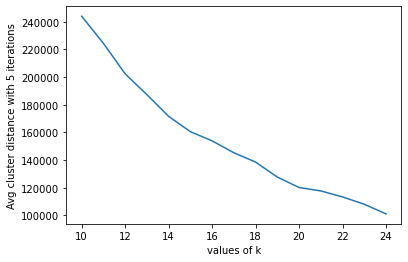

In [25]:
plt.xlabel("values of k")
plt.ylabel("Avg cluster distance with 5 iterations")
plt.plot(K,loss_val)


In [26]:
loss,pclust=obj.fit(ans)

In [52]:
cluster=[]

for i in pclust:
    df=pd.DataFrame(pclust[i])
    df['label']=i
    cluster.append(df)
    
population_all=pd.concat(cluster)

population_labels=population_all['label']
ppoints=population_all.drop('label',axis=1)
mclust=[]

for i in pclust:
    l=pd.DataFrame(pclust[i])
    l['label']=i
    mclust.append(l)
    
more_all=pd.concat(mclust)

more_labels=more_all['label']
mpoints=more_all.drop('label',axis=1)


In [29]:
pca1 = PCA(2) 
projected = pca1.fit_transform(ppoints)
pca2=PCA(2)
mprojected = pca2.fit_transform(mpoints)

Text(0, 0.5, 'feature 2')

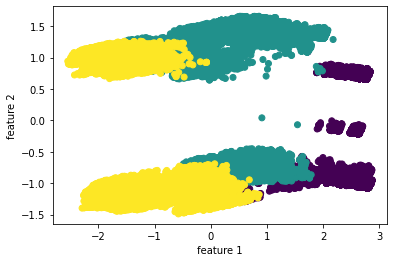

In [30]:
plt.scatter(projected[:, 0], projected[:, 1],c=population_labels)
plt.xlabel('feature 1')
plt.ylabel('feature 2')

In [134]:
pcav = PCA(40) 
new=new_DataFrame
n = pcav.fit_transform(new)

In [139]:
helper = new_DataFrame
model = Cluster_KMedian(20,50)
model.fit(np.array(n))
    
helper_pred = model.predict(np.array(n))
centers = model.centers

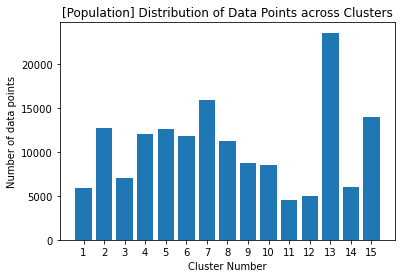

In [136]:
freq = pd.Series(helper_pred).value_counts()
x = [i for i in range(1,16)]
y = np.array([freq[i] for i in range(15)])

plt.title("Distribution of Data Points across Clusters in general population")
plt.xlabel("Cluster Number")
plt.ylabel("Number of data points")
plt.xticks(np.arange(1, 16, step=1))
plt.bar(x,y)
plt.show()


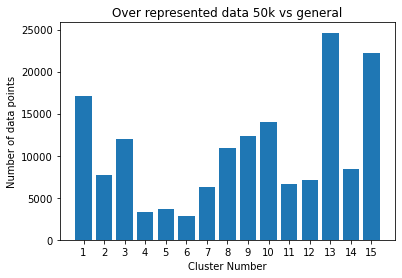

In [148]:
freq = pd.Series(helper_pred).value_counts()
x = [i for i in range(1,16)]
y = np.array([freq[i] for i in range(15)])

plt.title("Over represented data 50k vs general")
plt.xlabel("Cluster Number")
plt.ylabel("Number of data points")
plt.xticks(np.arange(1, 16, step=1))
plt.bar(x,y)
plt.show()


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from matplotlib import pyplot as plt
import random

morethandata=pd.read_csv("/Users/vasukhanna/Desktop/more_than_50k.csv")
description=pd.read_csv("/Users/vasukhanna/Desktop/Dataset Description.csv")
morethandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3580 entries, 0 to 3579
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   AAGE      3580 non-null   int64 
 1   ACLSWKR   3580 non-null   object
 2   ADTIND    3580 non-null   int64 
 3   ADTOCC    3580 non-null   int64 
 4   AHGA      3580 non-null   object
 5   AHRSPAY   3580 non-null   int64 
 6   AHSCOL    3580 non-null   object
 7   AMARITL   3580 non-null   object
 8   AMJIND    3580 non-null   object
 9   AMJOCC    3580 non-null   object
 10  ARACE     3580 non-null   object
 11  AREORGN   3580 non-null   object
 12  ASEX      3580 non-null   object
 13  AUNMEM    3580 non-null   object
 14  AUNTYPE   3580 non-null   object
 15  AWKSTAT   3580 non-null   object
 16  CAPGAIN   3580 non-null   int64 
 17  CAPLOSS   3580 non-null   int64 
 18  DIVVAL    3580 non-null   int64 
 19  FILESTAT  3580 non-null   object
 20  GRINREG   3580 non-null   object
 21  GRINST    3580

In [76]:
print(morethandata.isnull().sum())

AAGE        0
ACLSWKR     0
ADTIND      0
ADTOCC      0
AHGA        0
AHRSPAY     0
AHSCOL      0
AMARITL     0
AMJIND      0
AMJOCC      0
ARACE       0
AREORGN     0
ASEX        0
AUNMEM      0
AUNTYPE     0
AWKSTAT     0
CAPGAIN     0
CAPLOSS     0
DIVVAL      0
FILESTAT    0
GRINREG     0
GRINST      0
HHDFMX      0
HHDREL      0
MIGMTR1     0
MIGMTR3     0
MIGMTR4     0
MIGSAME     0
MIGSUN      0
NOEMP       0
PARENT      0
PEFNTVTY    0
PEMNTVTY    0
PENATVTY    0
PRCITSHP    0
SEOTR       0
VETQVA      0
VETYN       0
WKSWORK     0
YEAR        0
dtype: int64


In [ ]:
for i in morethandata :
    
    morethandata[i][morethandata[i]=='?']=np.nan

In [77]:
print(morethandata.isnull().sum())

AAGE        0
ACLSWKR     0
ADTIND      0
ADTOCC      0
AHGA        0
AHRSPAY     0
AHSCOL      0
AMARITL     0
AMJIND      0
AMJOCC      0
ARACE       0
AREORGN     0
ASEX        0
AUNMEM      0
AUNTYPE     0
AWKSTAT     0
CAPGAIN     0
CAPLOSS     0
DIVVAL      0
FILESTAT    0
GRINREG     0
GRINST      0
HHDFMX      0
HHDREL      0
MIGMTR1     0
MIGMTR3     0
MIGMTR4     0
MIGSAME     0
MIGSUN      0
NOEMP       0
PARENT      0
PEFNTVTY    0
PEMNTVTY    0
PENATVTY    0
PRCITSHP    0
SEOTR       0
VETQVA      0
VETYN       0
WKSWORK     0
YEAR        0
dtype: int64


In [78]:
# removing data with 30% null values
drop=["MIGMTR1","MIGMTR3","MIGMTR4","MIGSUN"]
for i in drop:
    morethandata=morethandata.drop(i,axis=1)

In [79]:
for col in morethandata.columns:
    mode=morethandata[col].mode()
    morethandata[col].fillna(mode[0],inplace=True)

print(morethandata.isnull().sum())


AAGE        0
ACLSWKR     0
ADTIND      0
ADTOCC      0
AHGA        0
AHRSPAY     0
AHSCOL      0
AMARITL     0
AMJIND      0
AMJOCC      0
ARACE       0
AREORGN     0
ASEX        0
AUNMEM      0
AUNTYPE     0
AWKSTAT     0
CAPGAIN     0
CAPLOSS     0
DIVVAL      0
FILESTAT    0
GRINREG     0
GRINST      0
HHDFMX      0
HHDREL      0
MIGSAME     0
NOEMP       0
PARENT      0
PEFNTVTY    0
PEMNTVTY    0
PENATVTY    0
PRCITSHP    0
SEOTR       0
VETQVA      0
VETYN       0
WKSWORK     0
YEAR        0
dtype: int64


In [80]:
morethandata["AAGE"].max()
morethandata["AAGE"].mean()
bins=[0,13,18,60,100]
labels=["Child","Teenager","Adult","Elderly"]
morethandata["AAGE_category"]=pd.cut(morethandata["AAGE"],bins,labels=labels)


In [81]:
morethandata["AHRSPAY"].max()
morethandata["AHRSPAY"].mean()
bins=[-1,100,500,10000]
labels=["low wage","average wage","high Wage"]
morethandata["WAGE_CATEGORY"]=pd.cut(morethandata["AHRSPAY"],bins,labels=labels)


In [82]:

morethandata["CAPGAIN"].mean()
bins=[-1,100,1000,20000,100000]
labels=["low ","average ","Good "," very High"]
morethandata["Cap_gain"]=pd.cut(morethandata["CAPGAIN"],bins,labels=labels)


In [83]:
morethandata["CAPLOSS"].mean()
bins=[-1,20,100,3000,5000]
labels=["low ","average ","High "," Very High"]
morethandata["Cap_loss"]=pd.cut(morethandata["CAPLOSS"],bins,labels=labels)


In [84]:
morethandata["DIVVAL"].mean()
bins=[-1,100,500,20000,100000]
labels=["low ","average ","Good ","Very High"]
morethandata["Div_val"]=pd.cut(morethandata["DIVVAL"],bins,labels=labels)


In [85]:
morethandata["WKSWORK"].mean()
bins=[-1,15,25,40,50]
labels=["less ","average ","above average ","High"]
morethandata["WKSWORK_category"]=pd.cut(morethandata["WKSWORK"],bins,labels=labels)


In [86]:
categorised_data=["AAGE","AHRSPAY","CAPGAIN","CAPLOSS","DIVVAL","WKSWORK"]
for i in categorised_data:
    morethandata=morethandata.drop(i,axis=1)

In [87]:
morethandata

,ACLSWKR,ADTIND,ADTOCC,AHGA,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,...,SEOTR,VETQVA,VETYN,YEAR,AAGE_category,WAGE_CATEGORY,Cap_gain,Cap_loss,Div_val,WKSWORK_category
0,Self-employed-incorporated,11,2,High school graduate,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Executive admin and managerial,White,All other,...,0,Not in universe,2,95,Adult,low wage,low,low,average,NaN
1,Private,3,38,High school graduate,Not in universe,Married-civilian spouse present,Mining,Transportation and material moving,White,All other,...,0,No,1,94,Adult,low wage,low,low,low,High
2,Private,19,26,High school graduate,Not in universe,Married-civilian spouse present,Manufacturing-nondurable goods,Adm support including clerical,White,All other,...,0,Not in universe,2,94,Adult,high Wage,low,low,low,NaN
3,Private,33,2,9th grade,Not in universe,Never married,Retail trade,Executive admin and managerial,White,All other,...,1,Not in universe,2,95,Adult,low wage,Good,low,average,NaN
4,Private,11,5,Bachelors degree(BA AB BS),Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Professional specialty,White,All other,...,0,Not in universe,2,95,Adult,low wage,low,low,low,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575,Private,14,37,High school graduate,Not in universe,Divorced,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,White,All other,...,0,Not in universe,2,94,Adult,low wage,low,low,Good,NaN
3576,Self-employed-not incorporated,37,12,Masters degree(MA MS MEng MEd MSW MBA),Not in universe,Separated,Business and repair services,Professional specialty,White,All other,...,0,Not in universe,2,94,Elderly,low wage,low,low,low,High
3577,Private,41,6,Masters degree(MA MS MEng MEd MSW MBA),Not in universe,Married-civilian spouse present,Hospital services,Professional specialty,White,All other,...,0,Not in universe,2,95,Adult,low wage,low,low,Good,NaN
3578,Self-employed-incorporated,35,2,Bachelors degree(BA AB BS),Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,White,All other,...,0,Not in universe,2,94,Adult,low wage,low,High,average,NaN


In [88]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
features=encoder.fit_transform(morethandata[['ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'FILESTAT', 'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MIGSAME', 'NOEMP', 'PARENT', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA', 'VETYN', 'YEAR', 'AAGE_category', 'WAGE_CATEGORY', 'Cap_gain', 'Cap_loss', 'Div_val', 'WKSWORK_category']]).toarray()
np.array(features)
labels=encoder.categories_
flatlist=[]
for sublist in labels:
    for element in sublist:
        flatlist.append(element)
labels=flatlist


In [89]:
new_DataFrame_50=pd.DataFrame(features,columns=labels)
new_DataFrame_50

,Federal government,Local government,Never worked,Not in universe,Private,Self-employed-incorporated,Self-employed-not incorporated,State government,0,1,...,low,Good,Very High,average,low,High,above average,average,less,NaN
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3576,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3577,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3578,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [90]:
class Cluster_KMedian():
    
    def __init__(self,noOfClusters=3,noOfIterations=5,n_dimensions=40):
        
        self.noOfClusters=noOfClusters
        
        self.noOfIterations=noOfIterations
        
        self.n_dimensions=n_dimensions
    
    def fit(self,data,plot=False):
        
        self.data=data
        
        self.centers=np.zeros((self.noOfClusters,self.n_dimensions))
        
        self.randoms=random.sample(range(len(data)),self.noOfClusters)
        
        i=0
        while i<len(self.randoms):
            self.centers[i]=data[self.randoms[i]]
            i=i+1
            
            
        self.iterations =[] 
        
        self.store_loss =[]
        
        iterations=0
        while iterations<self.noOfIterations:

            self.distance={}
            self.iterations.append(iterations)
            iterations=iterations+1
            v=0
            while v<self.noOfClusters:

                self.distance[v]=self.data-self.centers[v]
                self.distance[v]=np.absolute(self.distance[v])
                self.distance[v]=np.sum(self.distance[v],axis=1)
                v=v+1
                
                
                
                
            self.min_distance=self.distance[0]
            
            
            k=0
            while k<self.noOfClusters:

                self.min_distance=np.minimum(self.min_distance,self.distance[k])
                k=k+1
            
            self.store_loss.append(np.sum(self.min_distance))
            
            self.clusters={}
            
            j=0
            while j<self.noOfClusters:

                self.clusters[j]=(self.distance[j]==self.min_distance)
                self.clusters[j]=self.data[self.clusters[j]]
                j=j+1
            
            
            q=0
            while q<self.noOfClusters:
                self.centers[q]=np.median(self.clusters[q],axis=0)
                q=q+1
        
        loss=self.store_loss[-1]
        return loss,self.clusters
    def predict(self, test_data):
        predictions = []
        for point in test_data:
            ## N1 norm 
            distances = [(abs(point - m)).sum() for m in self.centers]
            ## minDistance
            minDistance = min(distances)
            ## find corresponding index
            l = distances.index(minDistance)
            ## append the cluster index
            predictions.append(l)
        return predictions

        

In [91]:
from sklearn.decomposition import PCA
pca=PCA(n_components=40)
reduced_new=pca.fit_transform(new_DataFrame_50)
K=[]
loss_val=[]
ans=np.asarray(reduced_new)
for i in range(10,25):
    K.append(i)
    obj=Cluster_KMedian()
    loss,_=obj.fit(ans)
    loss_val.append(loss/i)

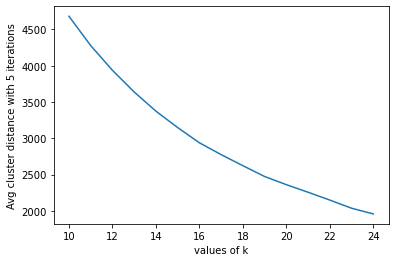

In [92]:
plt.xlabel("values of k")
plt.ylabel("Avg cluster distance with 5 iterations")
plt.plot(K,loss_val)


In [93]:
loss,moreclust=obj.fit(ans)

In [94]:
mclust=[]

for i in moreclust:
    vari_df=pd.DataFrame(moreclust[i])
    vari_df['label']=i
    mclust.append(vari_df)
    
more_all=pd.concat(mclust)

more_labels=more_all['label']
mpoints=more_all.drop('label',axis=1)

In [95]:
pca2=PCA(2)
mprojected = pca2.fit_transform(mpoints)

Text(0, 0.5, 'feature 2')

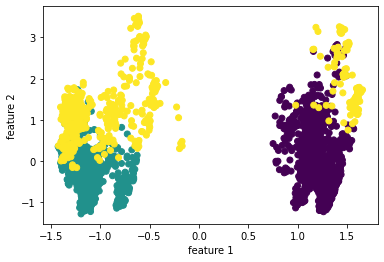

In [98]:
plt.scatter(mprojected[:, 0], mprojected[:, 1],c=more_labels)
plt.xlabel('feature 1')
plt.ylabel('feature 2')

In [131]:
pca_50 = PCA(40) 

new=new_DataFrame_50

n = pca_50.fit_transform(new)

In [132]:
helper = new_DataFrame_50

model = Cluster_KMedian(17,50)

model.fit(np.array(n))
    
helper_pred = model.predict(np.array(n))

centers = model.centers

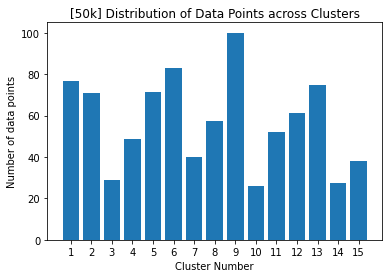

In [133]:
freq = pd.Series(helper_pred).value_counts()

x = [i for i in range(1,16)]

y_50 = np.array([freq[i] for i in range(15)])

plt.title(" Distribution of Data Points across Clusters in 50k")

plt.xlabel("Cluster Number")

plt.ylabel("Number of data points")

plt.xticks(np.arange(1, 16, step=1))

plt.bar(x,y)
plt.show()


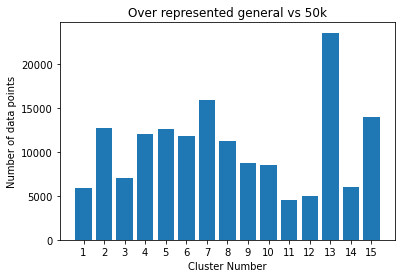

In [137]:
freq = pd.Series(helper_pred).value_counts()

x = [i for i in range(1,16)]

y_50 = np.array([freq[i] for i in range(15)])

plt.title("Over represented general vs 50k")

plt.xlabel("Cluster Number")

plt.ylabel("Number of data points")

plt.xticks(np.arange(1, 16, step=1))

plt.bar(x,y)
plt.show()


In [126]:
y = y*100.0/y.max()
y_50 = y_50*100.0/y_50.max()
ratio_1 = y/y_50
plt.title("Over Reperesented Clusters General vs 50_k")
plt.xlabel("Cluster Number")
plt.xticks(np.arange(1, 16, step=1))
plt.ylabel("Number of data points")
plt.bar(x,ratio_1)


In [130]:
temp = y_50/y
x = [i for i in range(1,16)]
plt.title("Over Reperesented Clusters 50_k vs General")
plt.xlabel("Cluster Number")
plt.xticks(np.arange(1, 16, step=1))
plt.ylabel("Number of data points")
plt.bar(x,temp)
plt.show()
